<a href="https://colab.research.google.com/github/Clarence-karanja/JAZZING-BEYOND-BORDERS/blob/main/source_seperation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎹🎻🥁
# **Jazzing Beyond Borders: Unlocking Multilingual Potential with Rhythm Analysis**
*proof of concept by: Clarence Karanja & Yvonne Njeri*  (Final year Statistics & Computer Science students @ Technical university of Mombasa)

**What We're Doing:**
We are studying how jazz music's rhythm patterns can help make speech recognition work better for different languages and accents.

**Why We're Doing It:**
We want to improve the way computers understand and recognize different languages when people speak. Jazz rhythms have interesting patterns that can be used to make this process more accurate, helping people from various backgrounds communicate more effectively.

**DETAILED EXPLANATION OF OUR PROCEDURE**

1. **Import Dependencies and Set Constants**:
At the beginning, we gather all the necessary tools and establish some specific rules and values that we'll use throughout the project. This includes software libraries and fixed numbers that guide our analysis.

2. **Load and Separate Audio**:
We take a piece of music, such as a portion of a jazz song, and process it to split it into separate tracks for each musical instrument. In this case, we're typically interested in the piano, bass, and drums.

3. **Establish Tempo Map**:
We create a tempo map by studying the music to determine where the strong beats or rhythmic pulses occur. This map helps us understand the underlying rhythm of the music.

4. **Detect Individual Onsets**:
We closely examine each instrument track to pinpoint the exact moments when individual notes or sounds begin. It's akin to identifying when a musician starts playing a single note or sound on their instrument. This information is crucial for understanding the rhythm and timing of the performance.

5. **Data Formatting for Modeling**:
We organize and format the data collected in the previous steps in a way that's suitable for computer modeling and analysis. This step involves aligning the estimated beat positions with the detected note onsets for each instrument.

6. **Generate Phase Correction Model**:
Here, we create a special mathematical model that helps us analyze how the musicians interact with each other rhythmically. This model allows us to understand the intricate details of their timing and coordination.

7. **Extract Coupling Coefficients**:
From our model, we extract specific coefficients that represent how closely the musicians are synchronized with each other. These coefficients provide quantitative measures of their rhythmic interaction.

8. **Visualize the Degree of Coupling**:
Finally, we use these coefficients to create visual representations or charts that illustrate the level of synchronization and coordination among the musicians. These visuals help us better comprehend how well the musicians are working together in the jazz performance.

## Import Dependencies and Set Constants:

The following few cells we will;
1. Load Essential Tools
In this part, we're like chefs preparing our kitchen. We bring in all the tools we need to cook up our project. These tools are special software libraries that help us work with music, sounds, and data.
2. Define Constants
Think of constants as fixed values that don't change. It's like setting our recipe with specific measurements. We decide on some important numbers that we'll use over and over again in our project. These numbers are like the recipe instructions that help us make sense of the data and music later on.

In [43]:
# We're setting up some folders to keep our Colab project outputs organized.
# Let's create a couple of folders to neatly store the results of our work in Colab.
!mkdir ./output/
!mkdir ./assets/

mkdir: cannot create directory ‘./output/’: File exists
mkdir: cannot create directory ‘./assets/’: File exists


In [44]:
# To use Spleeter, we have to install it first, along with FFmpeg.
# These tools aren't included with Colab out of the box, so we're adding them to our toolkit.
!apt install ffmpeg
!pip install spleeter

In [45]:
from spleeter.separator import Separator
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf

In [46]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [47]:
# Describing the key characteristics of the audio we can use.
SAMPLE_RATE = 44100       #represents the sample rate of the audio
HOP_LENGTH = 512          #the hop length used for processing the audio signal
INPUT_AUDIO = "input.mp3" #the name or path of the input audio file

In [ ]:
# Selected Audio Separation Model
selected_model = "spleeter:5stems"

In [48]:
# Tempo and Track Details
average_tempo = 180                  # The mean tempo of the track
min_tempo, max_tempo = 175, 185      # Minimum and maximum tempo values
tempo_deviation = 0.1                # The standard deviation of tempo
track_tightness = 2000               # Measure of how tight the track feels (subjective)
note_detection_threshold = 1/12      # Threshold for detecting a triplet quaver


## 2. Load and Separate Audio:

### **Loading Audio and Defining the Spleeter Model**

[*Spleeter*](https://github.com/deezer/spleeter) is a Python library for audio source separation, developed by Deezer, a popular streaming service. It is currently employed in professional audio software like [iZotope RX](https://www.izotope.com/en/products/rx.html) and [Steinberg Spectralayers](https://www.steinberg.net/spectralayers/). On the [MUSDB18 Source Separation leaderboard.](https://paperswithcode.com/sota/music-source-separation-on-musdb18), Spleeter ranks 16th among 25 entries.

Spleeter offers a range of pre-trained machine learning models, each capable of isolating different combinations of musical instruments. In this context, we are utilizing the 5stems model to separate the piano, bass, and drums from the stereo audio recording while excluding the vocals and other residual tracks. By default, Spleeter performs this separation up to 11kHz. However, it's important to note that with certain adjustments to the internal configuration files (although not recommended for online use), it can extend its capabilities up to 22kHz. For now, we are using the default settings, with the understanding that we may increase the sampling rate in our full implementation.

In [49]:
# First, we need to pull in the audio file we're using for analysis from GitHub
!wget -O input.mp3 https://github.com/Clarence-karanja/JAZZING-BEYOND-BORDERS/blob/main/input.mp3

--2023-09-25 14:15:18--  https://github.com/Clarence-karanja/JAZZING-BEYOND-BORDERS/blob/main/input.mp3
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4128 (4.0K) [text/plain]
Saving to: ‘input.mp3’

input.mp3           100%[===================>]   4.03K  --.-KB/s    in 0s      

2023-09-25 14:15:18 (44.0 MB/s) - ‘input.mp3’ saved [4128/4128]



In [ ]:
# Now we can load the full mix of the audio file in to Librosa.
full_mix, _ = librosa.load(
    INPUT_AUDIO,    # The filepath to our audio
    sr=SAMPLE_RATE,    # Our sample rate
    mono=False,    # Load the file in stereo, as we need both channels
    offset=0,    # Load the file from the very beginning
    duration=None,    # Don't trim the audio file
    dtype=np.float32    # Set the data type as a float for use in numpy
)

In [ ]:
# Now, we instantiate our Spleeter Separator instance.
# We use the model we specified as a constant earlier (i.e. 5stems)
separator = Separator(MODEL)

### Seperate the audio
One of the advantages of studying piano trio recordings over larger ensembles is that recording engineers typically used the stereo spectrum in a fairly predictable way. This knowledge of how instruments are panned can help us in source separation. For instance, in this recording, Scott LaFaro's bass is panned over to the right channel, Paul Motian's drums are on the left channel, and Bill Evans' piano is in the centre. We therefore can apply source separation individually to these channels to get the cleanest signal for each instrument.

In [ ]:
def extract_channel(
    waveform: np.array, channel: int
) -> np.array:
    """
    This function extracts the left or right channel from a stereo audio source.
    """
    return np.tile(waveform[:, channel].T.reshape(-1, 1), (1, 2))

In [ ]:
# Instantiate an empty dictionary to store our audio in
prediction = {}
# We apply source separation to the left channel only, for the drums
prediction['drums'] = separator.separate(extract_channel(full_mix.T, 0))['drums']
# ... and on the right channel for bass
prediction['bass'] = separator.separate(extract_channel(full_mix.T, 1))['bass']
# We use both channels for keys (these are centre panned)
prediction['piano'] = separator.separate(full_mix.T)['piano']

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/5stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/5stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 5stems archive


INFO:spleeter:Extracting downloaded 5stems archive


INFO:spleeter:5stems model file(s) extracted


INFO:spleeter:5stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# Let's listen to our drums extracted audio to make sure it sounds reasonable
Audio(prediction['drums'].T, rate=SAMPLE_RATE)

That sounds pretty good to me for now; while we occasionally get a bit of leakage from both the piano (0:12-0:15) and the bass (0:19-0:20), the ride cymbal, snare drum, and bass drum are all cutting through cleanly in the isolated drum track. We'll refine the source separation further in the full implementation.

## 2. Beat tracking from the full mix 🎹🎻🥁

To get a general idea of where each beat is in the complete ensemble recording, we now automatically generate a tempo map of the performance using beat tracking. We'll use this to match up the onsets detected in the individual piano, bass, and drum tracks with each crotchet beat in the performance.

Librosa implements two algorithms for beat tracking: the beat.beat_track function uses dynamic programming and peak-picking, and the beat.plp function uses predominant local pulse estimation. We implement both here and compare the results.

In [ ]:
# Generate an onset strength envelope for our full recording
full_oe = librosa.onset.onset_strength(
    y=full_mix.mean(axis=0),    # We need a mono file here, so average over both channels
    sr=SAMPLE_RATE,
    aggregate=np.median,    # The function used to aggregate overlapping frequencies in one frequency bin
    fmax=11000,    # The maximum frequency to use, corresponding to our upper limit in Spleeter
    center=False    # Do not center the tracked onsets on the envelope: this can cause issues with late annotation, see https://github.com/librosa/librosa/issues/1052
)

### Beat tracking using dynamic programming

In [ ]:
# Generate the tracked beats
_, full_be = librosa.beat.beat_track(
    y=full_mix.T,    # Load in the full mix, transposed as necessary
    sr=SAMPLE_RATE,
    hop_length=HOP_LENGTH,
    start_bpm=MEAN_TEMPO,    # 180 bpm approximately
    trim=True,    # Trims weak beats from start/end of recording
    tightness=TRACK_TIGHTNESS,    # Distribute beats tightly around the predicted tempo
    units='time',
    onset_envelope=full_oe
)

In [ ]:
# Overlay the tracked beats as clicks against the mixed audio file
full_be_clicks = librosa.clicks(
    times=full_be,
    sr=SAMPLE_RATE,
    length=full_mix.shape[1]
)
Audio(full_mix + full_be_clicks, rate=SAMPLE_RATE)

### Beat tracking using predominant local pulse estimation

In [ ]:
# Define a function for the prior tempo distribution used in pulse estimation

# By default, this is a uniform distribution over a defined minimum and maximum
# tempo. However, we know that tempo in jazz is very tightly distributed, so
# a uniform distribution doesn't seem appropriate. For now, I'm implementing
# this using a normal distribution. However, we could investigate other
# possible distributions in the full implementation, e.g. log-normal,
# truncated normal...
prior = stats.norm(loc=MEAN_TEMPO, scale=SD_TEMPO)

In [ ]:
# Generate the predominant local pulse estimation, using our prior function
pulse = librosa.beat.plp(
    y=full_mix.mean(axis=0),
    sr=SAMPLE_RATE,
    hop_length=HOP_LENGTH,
    prior=prior
)
# Peak pick beats from our plp estimation, as audio frames
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
# Convert our peak frames to times
beats_time = librosa.frames_to_time(beats_plp, sr=SAMPLE_RATE)

In [ ]:
# Overlay the tracked beats as clicks against the mixed audio file
clicks_plp = librosa.clicks(
    times=beats_time,
    sr=SAMPLE_RATE,
    length=full_mix.shape[1]
)
Audio(full_mix + clicks_plp, rate=SAMPLE_RATE)

### Visualise the difference between the two algorithms

In [ ]:
class OnsetStrengthTrackedBeatsPlot:
  """
  Creates a plot that compares the accuracy of detected beats between two
  methods of pulse estimation - a dynamic programming and predominant local
  pulse estimation algorithm. Also shows a spectrogram of the audio for
  comparison to the osnet strength.
  """

  def __init__(self, tracked_beats_dp, tracked_beats_plp, **kwargs):
    self.onset_envelope = full_oe
    self.tracked_beats_dp = tracked_beats_dp
    self.tracked_beats_plp = tracked_beats_plp
    self.x_cutoff = kwargs.get('x_cutoff', 10)
    self.fig, self.ax = plt.subplots(
        nrows=2, ncols=1, figsize=(15, 8), sharex=True, sharey=False
    )

  def _format_x_axis(
      self
  ) -> np.array:
    """
    Returns x-axis times with correct length, according to cutoff
    """

    x = librosa.times_like(
        self.onset_envelope, sr=SAMPLE_RATE, axis=-1, hop_length=HOP_LENGTH
    )
    return np.array([time for time in x if time < self.x_cutoff])

  def create_plot(
      self
  ) -> None:
    """
    Called from outside the class, generates the plot and saves
    """

    self._create_spectrogram()
    self._create_lineplot()
    self._format_ax()
    self._format_fig()
    self.fig.savefig(r'./output/beat_tracking.png', facecolor='white')

  def _create_spectrogram(
    self
  ) -> None:
    """
    Creates the spectrogram on the upper axis
    """

    # Get the desired number of samples for the track, with the cutoff
    shape = int((SAMPLE_RATE * self.x_cutoff))
    # Trim the duration of the track and convert to mono
    track = np.resize(full_mix, (2, shape)).mean(axis=0)
    # Get the amplitude (in decibels) of the track
    d = librosa.amplitude_to_db(np.abs(librosa.stft(track)), ref=np.max)
    # Show the spectrogram
    spec = librosa.display.specshow(
        d, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
        x_axis='time', y_axis='log', ax=self.ax[0]
    )
    # Add the colorbar in, on the right of the figure (next to the axis)
    cax = self.fig.add_axes([0.82, 0.54, 0.01, 0.335])
    self.fig.colorbar(spec, cax=cax, orientation='vertical', format="%+2.f dB")

  def _create_lineplot(
      self,
  ) -> None:
    """
    Creates the lineplot (onset envelope and detected beats) on the lower axis
    """

    # Plot our onset envelope, trimmed to the desired length
    x = self._format_x_axis()
    y = self.onset_envelope[:x.shape[0]]
    self.ax[1].plot(x, y)
    # Overlay our tracked beats as vertical lines
    for tb, col, lab in zip(
        [self.tracked_beats_dp, self.tracked_beats_plp],
        ['red', 'green'], ['DP', 'PLP']
    ):
        # Get only the beats before the cutoff
        lines = np.array([line for line in tb if line < self.x_cutoff])
        # Add the vertical lines onto the plot with the correct color and label
        self.ax[1].vlines(
            lines, ymin=0, ymax=y.max(), color=col, ls='--', label=lab
        )
    # Add the legend in and align with the upper axis colorbar
    self.fig.legend(bbox_to_anchor=(0.91, 0.375), frameon=False, title='Method')

  def _format_ax(
      self
  ) -> None:
    """
    Sets axis characteristics, e.g. title, labels
    """

    # Modify upper axis, the spectrogram
    self.ax[0].set(
        ylim=(0, 16384), xlabel='', title='Log-frequency power spectrogram'
    )
    # Modify lower axis, the line plot
    self.ax[1].set(title='Beat tracking')
    # Apply modifications to both axis
    for ax, lab in zip(self.ax.flatten(), ['Frequency (Hz)', 'Onset strength']):
        ax.set(xticks=np.linspace(0, self.x_cutoff, 6))
        ax.set_ylabel(lab, fontsize=18)

  def _format_fig(
      self
  ) -> None:
    """
    Sets figure-level attributes
    """

    # Adjust plot positioning slightly
    self.fig.subplots_adjust(right=0.8)
    # Add the x-axis label to the bottom of the plot
    self.fig.supxlabel('Time (s)', x=0.45, y=0.05, fontsize=18)

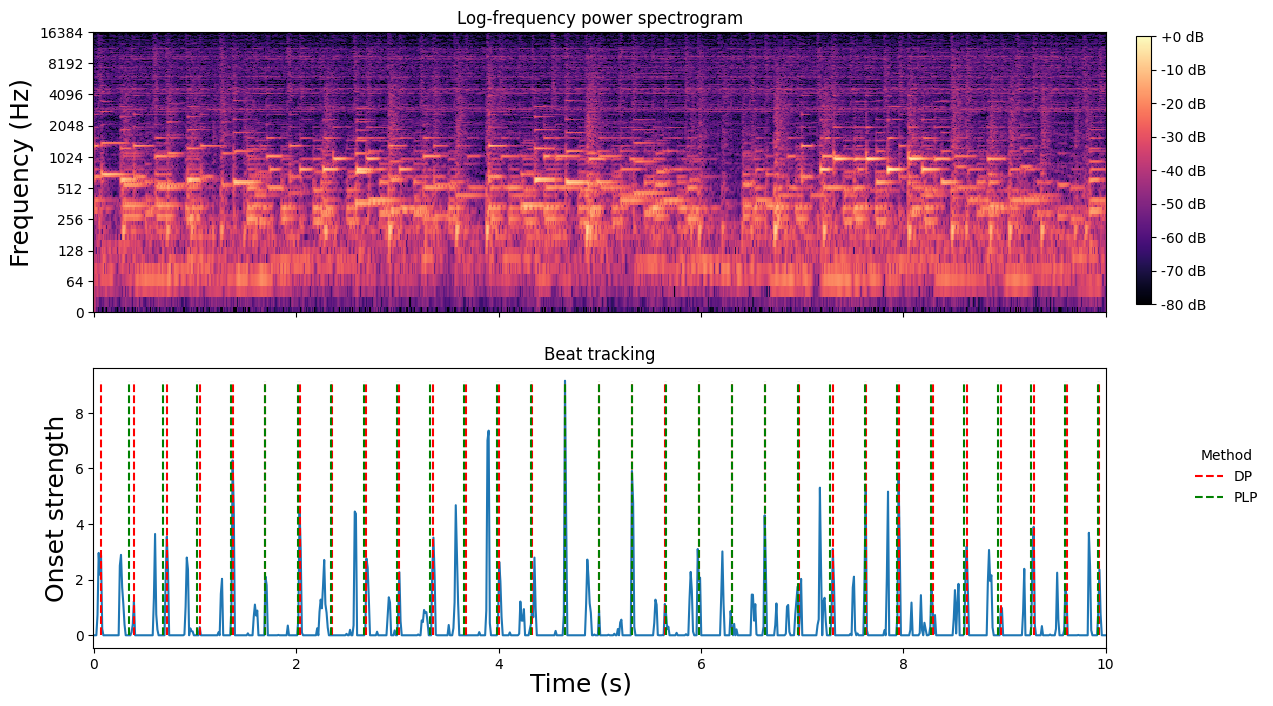

In [ ]:
os_ = OnsetStrengthTrackedBeatsPlot(
    tracked_beats_dp=full_be, tracked_beats_plp=beats_time
)
os_.create_plot()

Ok, so it looks like the dynamic programming algorithm is generally closer to the onset strength peaks we can perceive visually in the above graph. Going forwards, we'll use the results from this algorithm. We may wish to refine our choice of algorithm (and the arguments we provide it) as we develop the full implementation.

## 3. Detect onsets in the isolated tracks

We now need to detect onsets in the individual, source-separated tracks for each performer. Note that this is a different process than the beat-tracking we've just implemented: what we're now trying to do is automatically pick up the position of *every note* that e.g. the pianist or bassist plays, rather than the periodic crotchet pulse.

In the following code, we make use of the fmin= and fmax= arguments to restrict onset detection to a particular frequency band. These bands were ascertained from looking at the spectrograms of each recording to see which frequencies the desired instrument occupies. This process, we hope, should help mitigate the presence of any 'leaking' in the source-separated recordings -- e.g., if the bass leaks into the drum track, by omitting lower range frequencies this shouldn't effect the onset detection as much as processing the whole frequency band.

### Drum track 🥁
As the drum set consists of a variety of different drums and cymbals, we focus here on trying to detect onsets in the ride cymbal only. Our previous research has indicated that musicians typically understand this as the clearest indicator of tempo in a performance. In this recording, the ride cymbal sits in the upper frequency band, from about 2500 to 11000 (the limit of the Spleeter output) Hz.

In [ ]:
# Convert our dual-mono track to mono
drms = prediction['drums'].mean(axis=1)
# Create our onset envelope from the track
drms_oe = librosa.onset.onset_strength(
    y=drms,
    sr=SAMPLE_RATE,
    center=False,
    fmin=2500,    # The approximate minimum ride cymbal frequency
    fmax=11000,    # The approximate maximum ride cymbal frequency
    max_size=10,    # Size (in freqnuency bins) of the local maximum filter
)

In [ ]:
# Detect onsets using the onset envelope
drms_be = librosa.onset.onset_detect(
    y=drms,
    sr=SAMPLE_RATE,
    hop_length=HOP_LENGTH,
    units='time',
    onset_envelope=drms_oe
)

In [ ]:
# Overlay the detected onsets as clicks against the original isolated track
drms_clicks = librosa.clicks(
    times=drms_be, sr=SAMPLE_RATE, length=drms.shape[0]
)
Audio(drms + drms_clicks, rate=SAMPLE_RATE)

### Piano track 🎹
We concentrate on the mid-range frequency band, from 100 to 4000 Hz, when detecting onsets in the piano performance.

In [ ]:
keys = prediction['piano'].mean(axis=1)
keys_oe = librosa.onset.onset_strength(
    y=keys,
    sr=SAMPLE_RATE,
    hop_length=HOP_LENGTH,
    center=False,
    fmin=100, # The approximate minimum piano frequency
    fmax=4000, # The approximate maximum piano frequency
)

In [ ]:
keys_be = librosa.onset.onset_detect(
    y=keys,
    sr=SAMPLE_RATE,
    hop_length=HOP_LENGTH,
    units='time',
    onset_envelope=keys_oe
)

In [ ]:
keys_clicks = librosa.clicks(
    times=keys_be, sr=SAMPLE_RATE, length=keys.shape[0]
)
Audio(keys + keys_clicks, rate=SAMPLE_RATE)

### Bass track 🎻
Most of the energy for the bass is concentrated in the lower frequency range, from about 50 to 2000 Hz, so we can concentrate the onset detection on this region.

In [ ]:
bass = prediction['bass'].mean(axis=1)
bass_oe = librosa.onset.onset_strength(
    y=bass,
    sr=SAMPLE_RATE,
    hop_length=HOP_LENGTH,
    fmin=50,    # The approximate minimum bass frequency
    fmax=2000,    # The approximate maximum bass frequency
    max_size=1100,   # This helps reduce the frequency of false detections
    center=False,
    detrend=True
)

In [ ]:
bass_be = librosa.onset.onset_detect(
    y=bass,
    sr=SAMPLE_RATE,
    units='time',
    onset_envelope=bass_oe
)

In [ ]:
bass_clicks = librosa.clicks(
    times=bass_be, sr=SAMPLE_RATE, length=bass.shape[0]
)
Audio(bass + bass_clicks, rate=SAMPLE_RATE)

Ok, while those detected onsets definitely aren't perfectly aligned with the performances, they do capture enough information to work for now as a proof of concept. In particular, future refinements will aim to increase the precision of the piano (we're missing out quite a few onsets in the faster passages) and bass (again, a few onsets missed) detection. Note that any 'repeat' onsets -- e.g. where one bass note is captured twice in quick succession -- will be filtered later on. We may want to refine this in the future, so they're not present, however.

## 4. Data preparation
We now need to carry out a cleaning procedure to get our data into the correct form for modelling. This involves matching onsets detected in each individual isolated track with the metrical grid of crotchet beats extracted from the full stereo file, and coercing the data into the correct format for modelling (e.g. by extracting inter-onset intervals).

### Match detected onsets with tracked metrical grid

In [ ]:
def onset_matcher(
    ons: np.float32, ins: np.array,
) -> np.float32:
    """
    This function tries to match an estimated crotchet beat position (estimated from the full stereo mix)
    with the nearest onset played by one performer (estimated from the source-seperated track).

    If a close match cannot be found, i.e. it's above a set threshold, we set this data to missing. In this
    case, either the onset detection algorithm did not pick up this onset, or the musician did not play
    on that beat.

    By default, our threshold (set as a constant) is a 16th note, equivalent to 81 milliseconds at the
    set tempo of 180 beats-per-minute.
    """

    # Get our closest match from our array of detected onsets
    v = ins[np.abs(ins - ons).argmin()]
    # Calculate our detection threshold
    threshold = ((60 / MEAN_TEMPO) * 4) * DETECTION_THRESHOLD
    # Return our onset if it's below our threshold, else return NaN
    return v if np.abs(v - ons) <= threshold else np.nan

In [ ]:
def matcher_helper(
    ons: float
) -> dict:
    """
    A simple helper function that runs onset_matcher for a single onset for every performer, i.e. once
    for bass, drums, and keys, and then returns a dictionary.
    """

    return {
        'onset': ons,
        'keys_match': onset_matcher(ons, keys_be),
        'bass_match': onset_matcher(ons, bass_be),
        'drms_match': onset_matcher(ons, drms_be)
    }

# Create the dataframe
df = pd.DataFrame([matcher_helper(ons) for ons in full_be])

### Coerce the data into the correct format

In [ ]:
def data_coerce(
    y_ins: str, x_ins: list[str]
) -> pd.DataFrame:
    """
    This function simply coerces the data for one performer into the correct format by creating new columns.
    The new columns correspond to:

    - instrument1_prev_ioi: the inter-onset interval between the current and the previous onset
    - instrument1_next_ioi: the inter-onset interval between the current and the *next* onset
    - instrument1_instrument2_asynchrony: the asynchrony between the two instruments at the current onset
    """

    # Compile the inter-onset intervals
    dic = {
        f'{y_ins}_prev_ioi': df[f'{y_ins}_match'].diff(),
        f'{y_ins}_next_ioi': df[f'{y_ins}_match'].diff().shift(-1),
    }
    # Update the dictionary with our asynchrony values
    dic.update({
        f'{y_ins}_{ins}_asynchrony': df[f'{ins}_match'] - df[f'{y_ins}_match'] for ins in x_ins
    })
    # Return the dictionary as a dataframe
    return pd.DataFrame(dic)

In [ ]:
# Concatenate our original dataframe with the new columns we need each for the piano, drummer, and bassist
df_conc = pd.concat(
    [
        df,
        data_coerce('drms', ['keys', 'bass']),
        data_coerce('keys', ['drms', 'bass']),
        data_coerce('bass', ['drms', 'keys'])
    ],
    axis=1
)

## 5. Phase correction modelling
Now we have the data in the correct format, we can begin to create our model. This is a linear phase correction model (Vorberg & Wing, 1996), which predicts the duration of future inter-onset intervals by a performer from both the duration of prior inter-onset intervals by that same performer and the asynchrony between their’s and their partner’s previous onset (Jacoby et al., 2021).

### Generate the model

In [ ]:
def gen_model(
    y_ins: str, x_ins: list[str]
):
    """
    This function takes in the name of one instrument (y_ins) and the remaining two instruments (x_ins), then
    constructs the model in the required format and returns the OLSResults object
    """

    # Format our asynchrony (coupling) terms in the model
    x_ins = '+'.join(f'{y_ins}_{ins}_asynchrony' for ins in x_ins)
    # Format the rest of our model
    md = f'{y_ins}_next_ioi~{y_ins}_prev_ioi+' + x_ins
    # Create the regression model, fit to the data, and return
    return smf.ols(md, data=df_conc).fit()

In [ ]:
# Generate our regression models for each instrument
mds = [
    gen_model('drms', ['keys', 'bass']),
    gen_model('keys', ['drms', 'bass']),
    gen_model('bass', ['keys', 'drms'])
]

In [ ]:
# Extract the coupling responses from the model parameters
coefs = {
    p: c for md in mds for p, c in md.params.to_dict().items() if 'asynchrony' in p
}

In [ ]:
# Coerce the coupling responses into a dataframe
df_coefs = pd.DataFrame(coefs.items(), columns=['ins', 'coupling'])
df_coefs[['influenced', 'influencer', '_']] = df_coefs['ins'].str.split('_', expand=True)
df_coefs = df_coefs.drop(columns=['ins', '_']).sort_values(by='influencer')

## 6. Visualise the coupling responses between musicians
We now create a graph that shows visually the modelled coupling responses between the three musicians. This plot is similar to Figure 3b. in Jacoby et al (2021). The direction of arrows on our plot indicates the influence and influencer instruments, namely the tendency of one performer to follow (and adapt to) the indicated instrument: the thickness and colour of the arrows indicate the strength of this coupling.

In [ ]:
# Here, we pull in the image files we're going to use to display on our graph
!wget -O ./assets/bill.jpg https://github.com/HuwCheston/source-seperation-test/raw/main/assets/bill.jpg
!wget -O ./assets/scott.jpg https://github.com/HuwCheston/source-seperation-test/raw/main/assets/scott.jpg
!wget -O ./assets/paul.jpg  https://github.com/HuwCheston/source-seperation-test/raw/main/assets/paul.jpg
!wget -O ./assets/cover.jpg  https://github.com/HuwCheston/source-seperation-test/raw/main/assets/cover.jpg

--2023-09-25 12:21:16--  https://github.com/HuwCheston/source-seperation-test/raw/main/assets/bill.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HuwCheston/source-seperation-test/main/assets/bill.jpg [following]
--2023-09-25 12:21:16--  https://raw.githubusercontent.com/HuwCheston/source-seperation-test/main/assets/bill.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29016 (28K) [image/jpeg]
Saving to: ‘./assets/bill.jpg’

./assets/bill.jpg   100%[===================>]  28.34K  --.-KB/s    in 0.003s  

2023-09-25 12:21:16 (10.8 MB/s) - ‘./assets/bill.jpg’ saved [29016/29016]

--2023-09

In [ ]:
class PhaseCorrectionPlot:
    """
    This class generates a plot where showing the measured couplings between each musician in the recording.
    The direction of arrows indicates the influence and influencer instruments, namely the tendency of one performer
    to follow (and adapt to) the indicated instrument: the thickeness and colour of the arrows indicate the strength
    of this coupling.

    NB. This graph is similar to Figure 3b. in Jacoby et al. (2021)
    """
    def __init__(self, **kwargs):
        plt.rcParams.update({'font.size': 18})
        self.df = kwargs.get('df', df_coefs)
        self.fig, self.ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 10))
        self.ax.axis('off')
        self.ax.set_aspect('equal')
        self.colors = ['red', 'blue', 'green']

    def create_plot(
        self
    ) -> None:
        """
        Called from outside the class to generate the required plot elements, show them, and save in the assets folder
        """

        self._add_musicians_images()
        self._add_cover_image()
        self._add_extra_text()
        self._create_plot()
        plt.show()
        self.fig.savefig(r'./output/modelled_coupling.png', facecolor='white')

    def _create_plot(
        self, arrow_mod: float = 25
    ) -> None:
        """
        Creates the plot arrows and annotations, according to the modelled coupling responses.
        The arrow_mod argument is the scaling applied to the coupling coefficient, used to set the correct width of the arrows.
        """

        instruments = ['bass', 'drms', 'keys']
        # The starting coordinate for each arrow, i.e. the arrow tail
        start_coords = [
            [(0.35, 0.95), (0.725, 0.175)],
            [(0.15, 0.325), (0.85, 0.325)],
            [(0.65, 0.95), (0.275, 0.075)],
        ]
        # The end coordinate for each arrow, i.e. the arrow head
        end_coords = [
            [(0.05, 0.325), (0.275, 0.175)],
            [(0.35, 0.75), (0.65, 0.75)],
            [(0.95, 0.325), (0.725, 0.075)],
        ]

        # Iterate over each influencer instrument, their respective arrows, and the color they're associated with
        for influencer, start_coord, end_coord, col in zip(
            instruments, start_coords, end_coords, self.colors
        ):
            # Iterate over each instrument they influence, and each individual arrow
            for influenced, (x, y), (x2, y2) in zip(
                [i for i in instruments if i != influencer], start_coord, end_coord
            ):
                # Get our coupling coefficient
                subs = self._get_coupling_coefficient(influenced, influencer)
                # Add in the arrow
                self.ax.annotate(
                    '', xy=(x, y), xycoords=self.ax.transAxes,
                    xytext=(x2, y2), textcoords=self.ax.transAxes,
                    arrowprops=dict(
                        width=arrow_mod * subs, edgecolor=col, lw=1.5, facecolor=col, headwidth=20
                    )
                )
                self._add_coupling_constant(subs, x, x2, y, y2)

    def _get_coupling_coefficient(
        self, influenced: str, influencer: str
    ) -> float:
        """
        Helper function to get the coupling coefficient between two instruments,
        the influencer and influenced.
        """

        return self.df[
            (self.df['influencer'] == influenced) &
            (self.df['influenced'] == influencer)
        ]['coupling'].iloc[0]


    def _add_coupling_constant(
        self, constant, x, x2, y, y2, mod: float = 0.03
    ) -> None:
        """
        Adds coupling coefficient
        """

        # Get the default annotation position, the midpoint of our arrow
        x_pos = (x + x2) / 2
        y_pos = (y + y2) / 2
        # Bottom of plot
        if y_pos < 0.3:
            y_pos += mod
        # Top left of plot
        elif x_pos < 0.5:
            y_pos += mod
            x_pos -= (mod * 1.1)
        # Right of plot
        elif x_pos > 0.5:
            y_pos += mod
            x_pos += (mod * 1.1)
        # Add in the text using the x and y position
        self.ax.text(
            x_pos, y_pos, round(abs(constant), 2), ha='center', va='center', fontsize=14
        )

    def _add_cover_image(
        self
    ) -> None:
        """
        Adds in the album cover artwork to the plot
        """

        # Read the image and add it to the plot
        img = plt.imread(r'/content/assets/cover.jpg')
        img = mpl.offsetbox.OffsetImage(img, zoom=0.5)
        ab = mpl.offsetbox.AnnotationBbox(
            img, (0.5, 0.5), xycoords='data',
            bboxprops=dict(edgecolor='black', boxstyle='sawtooth', lw=2)
        )
        self.ax.add_artist(ab)
        # Add in the caption to the album artwork
        txt = """$Peri's$ $Scope$ (1959)\nRhythmic adaptation\nbetween musicians"""
        self.ax.text(0.5, 0.325, txt, ha='center', va='center', fontsize=15)

    def _add_musicians_images(
        self
    ) -> None:
        """
        Adds images corresponding to each performer in the trio
        """

        # Iterate through the position for each picture, the amount of zoom,
        # the name of the performer, and the colour of the box around the picture
        for (x, y), zoom, txt, col  in zip(
            [(0.125, 0.125), (0.5, 0.875), (0.867, 0.133),],
            [.68, .6375, .75,],
            ['Scott LaFaro (bass)', 'Paul Motian\n(drums)', 'Bill Evans (piano)',],
            self.colors
        ):
            # Get the filepath from the performer's name
            mus = txt.split(' ')[0].lower()
            # Display the image
            img = plt.imread(fr'/content/assets/{mus}.jpg')
            img = mpl.offsetbox.OffsetImage(img, zoom=zoom)
            ab = mpl.offsetbox.AnnotationBbox(
                img, (x, y), xycoords='data', bboxprops=dict(edgecolor=col, lw=2)
            )
            self.ax.add_artist(ab)
            # Add the text in, adjacent to the image
            self.ax.text(
                x, y + 0.15 if y < 0.5 else y - 0.175,
                txt, ha='center', va='center', color=col
            )

    def _add_extra_text(
        self
    ) -> None:
        """
        Adds some additional extra text into the plot, e.g. titles, descriptions
        """
        txt = """Modelling interaction in the\njazz rhythm section using \nsource-seperated commercial\naudio recordings"""
        self.ax.text(-0.05, 0.9, txt, fontsize=12, ha='left', va='center', fontstyle='italic')
        txt = """Proof of Concept"""
        self.ax.text(-0.05, 0.8, txt, fontsize=12, ha='left', va='center', fontweight='bold')
        txt = """Direction of arrows indicate the\ntendency of one performer\nto follow (adapt to) another;\nthickness and colour of the\narrows indicate coupling\nstrength."""
        self.ax.text(1.05, 0.875, txt, fontsize=12, ha='right', va='center',)

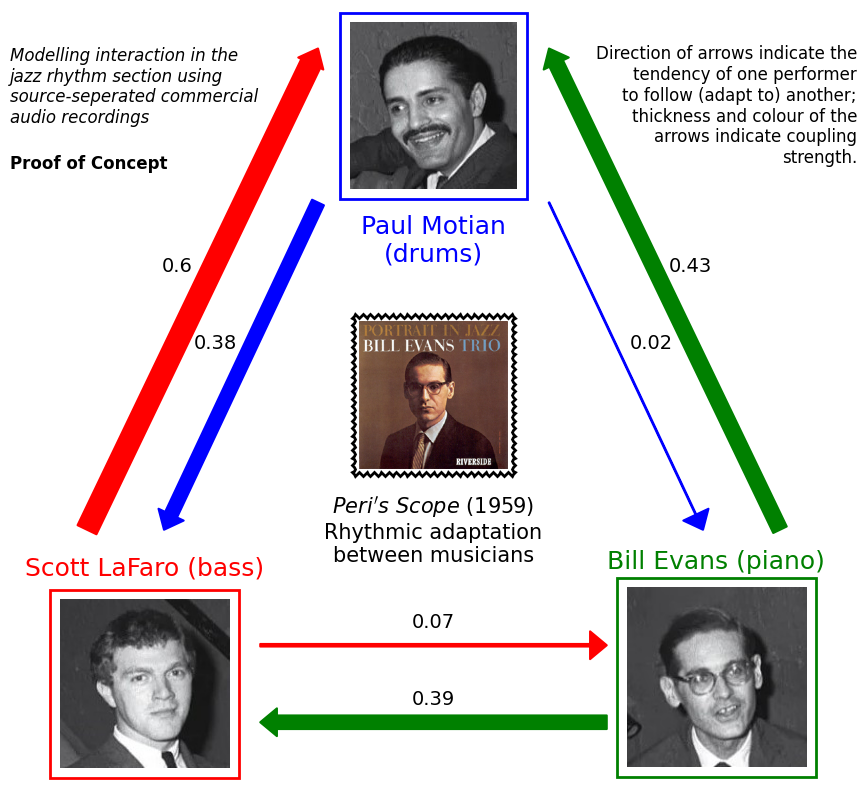

In [ ]:
vis = PhaseCorrectionPlot(df=df_coefs)
vis.create_plot()

Even from the small, 30-second excerpt we've used here, the graph above shows some interesting details. Namely, both the bass and drums are tightly coupled to each other, but not to the piano soloist. The piano, meanwhile, couples strongly to both the bass and drums. In this sense, rhythmic adaptation is orientated towards the bass and drums comping, which provides an anchor for the piano improvisations.